In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math

def getSlope(p1, p2):
  dy = (p2[1] - p1[1])
  dx = (p2[0] - p1[0])
  return  math.inf if dx == 0 else dy/dx

def getTerminalPoints(pt, d, m):
  #pt is the point from which we need to find two points at distance d. The joining line of those two points will have slope m.
  dy = 0
  dx = 0
  if m == 0:
    dx = d
  if math.isinf(m):
    dy = d
  else:
    dx = (d / math.sqrt(1 + (m * m)))
    dy = m * dx
  return [(pt[0]-dx, pt[1]-dy), (pt[0]+dx, pt[1]+dy)]


Point 1 :  [ 6.99701175 -8.3131954 ]
Point 2 :  [48.73475849 41.06227375]
Distance :  64.65273742635691
Slope :  1.1829931660337465
[48.73475849 41.06227375] (38.30032180610425, 53.40614103857538) (59.169195173885214, 28.718406461666838)
[[48.73475849 41.06227375]
 [38.30032181 53.40614104]
 [59.16919517 28.71840646]
 [48.73475849 41.06227375]]


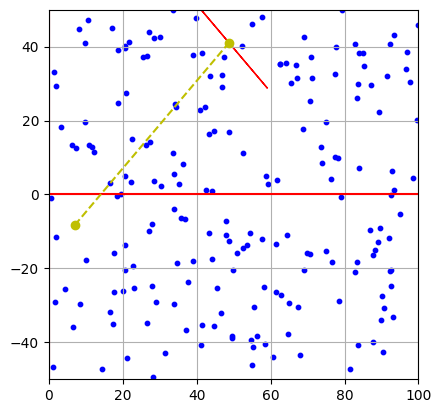

In [37]:


thrs_dist = 50
thrs_w_h = 0.25
num_points = 200
fig = plt.figure()
ax = fig.add_subplot(
    autoscale_on=False,
    xlim=(0, 100),
    ylim=(-50, 50)
)
ax.set_aspect("equal")
ax.grid()
x = np.random.uniform(low=0, high=100, size = num_points)
y = np.random.uniform(low=-50, high=50, size = num_points)
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.scatter(x, y, color='blue', s = 10)
# plt.show()
while True:
  ix1 = np.random.randint(0, num_points-1)
  ix2 = np.random.randint(0, num_points-1)
  pt1 = np.array([x[ix1], y[ix1]])
  pt2 = np.array([x[ix2], y[ix2]])
  if np.linalg.norm(pt1 - pt2) > thrs_dist:
    break
print("Point 1 : ",pt1)
print("Point 2 : ",pt2)
h = np.linalg.norm(pt1 - pt2)
m = getSlope(pt1, pt2)
print("Distance : ", h)
print("Slope : ", m)
plt.plot(np.array([x[ix1], x[ix2]]), np.array([y[ix1], y[ix2]]), 'yo--')
w = h * thrs_w_h
term_pts = getTerminalPoints(pt2, w, math.inf if m == 0 else -m if math.isfinite(m) else 0)
print(pt2, term_pts[0], term_pts[1])
xs = [pt2[0], term_pts[0][0], term_pts[1][0], pt2[0]]
ys = [pt2[1], term_pts[0][1], term_pts[1][1], pt2[1]]
polygon = plt.Polygon(xy=[pt2, term_pts[0], term_pts[1]], edgecolor='red', fill=True)
print(polygon.get_xy())
ax.add_patch(polygon)
plt.show()